<h1 style="text-align: center;">Exploratory Data Analysis of Credit Card Transactions for Fraud Detection</h1>



**Project Overview:**

Credit card fraud is a significant concern for financial institutions and consumers. Fraudulent activities cause substantial losses and impact customer trust. This project aims to perform Exploratory Data Analysis (EDA) on credit card transaction data to identify patterns and anomalies that may indicate fraudulent behavior.





### Load Dataset and Check Structure

Load the dataset and check the number of rows and columns to understand its structure. Display the first few rows to get an overview of the data.

In [1]:
#Importing necessary libraries and loading the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Check the number of rows and columns
df_shape = df.shape

# Print the total number of rows and columns
print(f'Total Number of Rows: {df_shape[0]}')
print(f'Total Number of Columns: {df_shape[1]}')


Total Number of Rows: 284807
Total Number of Columns: 31


In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###  Inspect Column Names and Data Types

Inspect the columns in the dataset and their data types to understand the structure and format of the data for analysis

In [3]:
# Get the column names and data types
column_info = df.dtypes

# Display the column names and their data types
print("Column Names and Data Types:")
print(column_info)


Column Names and Data Types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


### Check for Missing Values

Check for any missing or null values in the dataset, as missing data can affect the quality of analysis and modeling

In [4]:
# Check for null or missing values in each column
missing_values = df.isnull().sum()

# Display the missing values for each column
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


###  Count the number of fraudulent and legitimate transactions

Check the number of fraudulent (Class = 1) and legitimate (Class = 0) transactions to understand the class distribution

In [5]:
# Count the number of fraudulent and legitimate transactions
transaction_counts = df['Class'].value_counts()

# Display the counts directly as text
print("Number of Legitimate Transactions: ", transaction_counts[0])
print("Number of Fraudulent Transactions: ", transaction_counts[1])

# Calculate the percentage of fraudulent and legitimate transactions
fraud_percentage = (transaction_counts[1] / transaction_counts.sum()) * 100
legitimate_percentage = (transaction_counts[0] / transaction_counts.sum()) * 100

# Display the percentages
print(f"Percentage of Fraudulent Transactions: {fraud_percentage:.2f}%")
print(f"Percentage of Legitimate Transactions: {legitimate_percentage:.2f}%")


Number of Legitimate Transactions:  284315
Number of Fraudulent Transactions:  492
Percentage of Fraudulent Transactions: 0.17%
Percentage of Legitimate Transactions: 99.83%


**Number of Legitimate and Fraudulent Transactions:**
* Number of Legitimate Transactions: **284,315**
* Number of Fraudulent Transactions: **492**

**Percentage of Transactions:**

* Percentage of Fraudulent Transactions: **0.17%**
* Percentage of Legitimate Transactions: **99.83%**

### Visualize Transaction Type Distribution

Count and visualize the number of fraudulent and legitimate transactions to compare the two transaction types

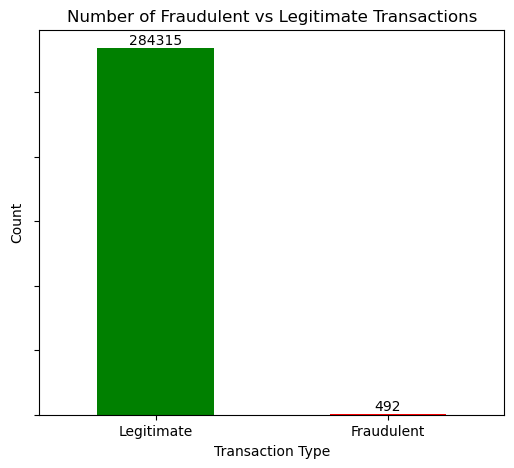

In [6]:
# Count the number of fraudulent and legitimate transactions
transaction_counts = df['Class'].value_counts()

# Plotting the results with shorter bars and higher number placement
plt.figure(figsize=(6, 5))  # Adjusted figure size for shorter bars
ax = transaction_counts.plot(kind='bar', color=['green', 'red'])

plt.title('Number of Fraudulent vs Legitimate Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Fraudulent'], rotation=0)

# Adding the count values on top of each bar, with a larger offset for more space
for i in range(len(transaction_counts)):
    ax.text(i, transaction_counts[i] + 3000, str(transaction_counts[i]), ha='center', color='black')

# Remove the y-axis label count on the side
plt.gca().set_yticklabels([])

plt.show()



###  Visualize Percentage of Transactions Type

Calculate and visualize the percentage of fraudulent & legitimate transactions in the dataset with a bar chart.

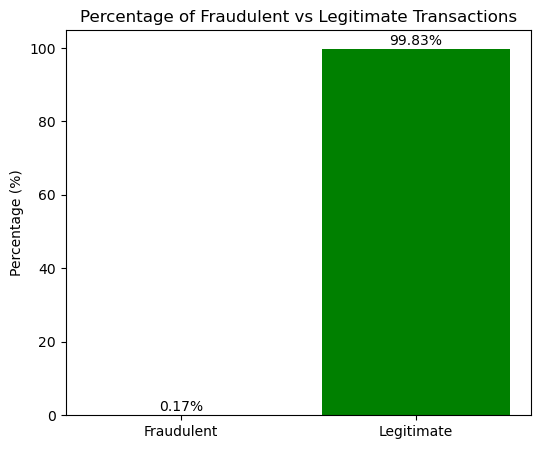

In [7]:
# Calculate the percentage of fraudulent transactions
fraudulent_percentage = (transaction_counts[1] / transaction_counts.sum()) * 100

# Plotting the percentage of fraudulent transactions
plt.figure(figsize=(6, 5))
ax = plt.bar(['Fraudulent', 'Legitimate'], [fraudulent_percentage, 100 - fraudulent_percentage], color=['red', 'green'])

plt.title('Percentage of Fraudulent vs Legitimate Transactions')
plt.ylabel('Percentage (%)')

# Adding the percentage values on top of each bar, ensuring they are inside the plot
for i, v in enumerate([fraudulent_percentage, 100 - fraudulent_percentage]):
    ax[i].set_height(v)  # Setting the height based on percentage
    # Adjusted the offset to a smaller value to ensure text stays within the plot
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', color='black')  # Offset of +2 for better positioning

plt.show()


###  Summary Statistics for 'Amount' Column

Calculate key statistics (min, max, mean, median) for all numerical columns using the describe() method to understand the data distribution and identify any anomalies

In [8]:
#  get the summary statistics for the 'Amount' column
amount_stats = df['Amount'].describe()

# Display the summary statistics for the 'Amount' column
print("Summary statistics for 'Amount' column:")
print(amount_stats)


Summary statistics for 'Amount' column:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


* Count: **284,807** transactions
* Mean: **88.35**
* Standard Deviation: **250.12**
* Minimum: **0.00**
* 25th Percentile: **5.60**
* 50th Percentile (Median): **22.00**
* 75th Percentile: **77.17**
* Maximum: **25,691.16**





### Identify the Maximum Transaction Amount and Fraud Status

Find the maximum transaction amount in the dataset and check if it is fraudulent or legitimate

In [9]:
# Find the maximum transaction amount
max_amount = df['Amount'].max()

# Find the transaction details for the maximum amount
max_transaction = df[df['Amount'] == max_amount]

# Map fraud status to English labels
fraud_status = "Fraudulent" if max_transaction.iloc[0]['Class'] == 1 else "Non-fraudulent"

# Display the results
print(f"The maximum transaction amount is {max_amount}.")
print(f"Fraud status of the transaction: {fraud_status}")

The maximum transaction amount is 25691.16.
Fraud status of the transaction: Non-fraudulent


*   The maximum transaction amount is **25691.16**
*   The fraud status of this transaction is **Non-fraudulent**







###  Visualize Transaction Amount Distribution

Understand the distribution of transaction amounts to identify patterns and detect any unusual spikes

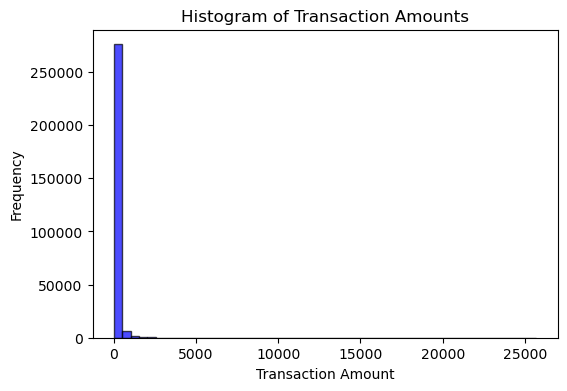

In [10]:
# Plot the histogram of transaction amounts
plt.figure(figsize=(6, 4))  # Adjust the figure size
plt.hist(df['Amount'], bins=50, color='blue', alpha=0.7, edgecolor='black')

# Add title and labels
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Show the plot
plt.show()



- Most transactions are in the 0-100 range, with fewer transactions above 500, indicating a concentration of lower-value transactions.


### Percentage Distribution of Transaction Amounts
- Analyzing the percentage of transactions within different amount ranges helps identify spending patterns and trends in the dataset.

In [11]:
# Define bins and labels
bins = [0, 100, 500, 1000, float('inf')]
labels = ['0-100', '100-500', '500-1000', 'Above 1000']

# Categorize amounts into bins
df['Amount_Range'] = pd.cut(df['Amount'], bins=bins, labels=labels, right=False)

# Calculate percentage distribution
percentage_distribution = df['Amount_Range'].value_counts(normalize=True) * 100

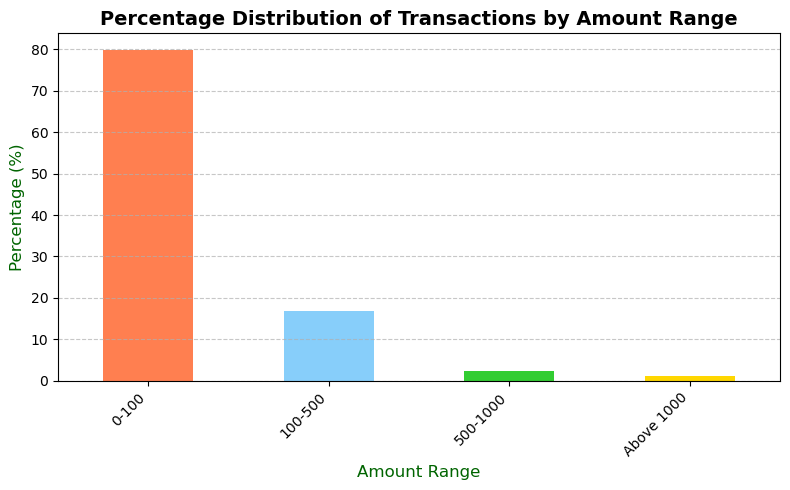

In [12]:
# Plot a bar chart with improved styling
plt.figure(figsize=(8, 5))
colors = ['#FF7F50', '#87CEFA', '#32CD32', '#FFD700']  # A colorful palette
percentage_distribution.plot(kind='bar', color=colors)

# Adding a title and labels with enhanced styling
plt.title('Percentage Distribution of Transactions by Amount Range', fontsize=14, fontweight='bold')
plt.xlabel('Amount Range', fontsize=12, color='darkgreen')
plt.ylabel('Percentage (%)', fontsize=12, color='darkgreen')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the chart
plt.tight_layout()
plt.show()




- **0-100**: 79.85% (Transactions with amounts less than 100)
- **100-500**: 16.82% (Transactions with amounts between 100 and 500)
- **500-1000**: 2.26% (Transactions with amounts between 500 and 1000)
- **Above 1000**: 1.08% (Transactions with amounts greater than 1000)


### Visualize the Correlation Between Numerical Features

understand the relationships between numerical features in the dataset and identify any strong correlations that may exist.

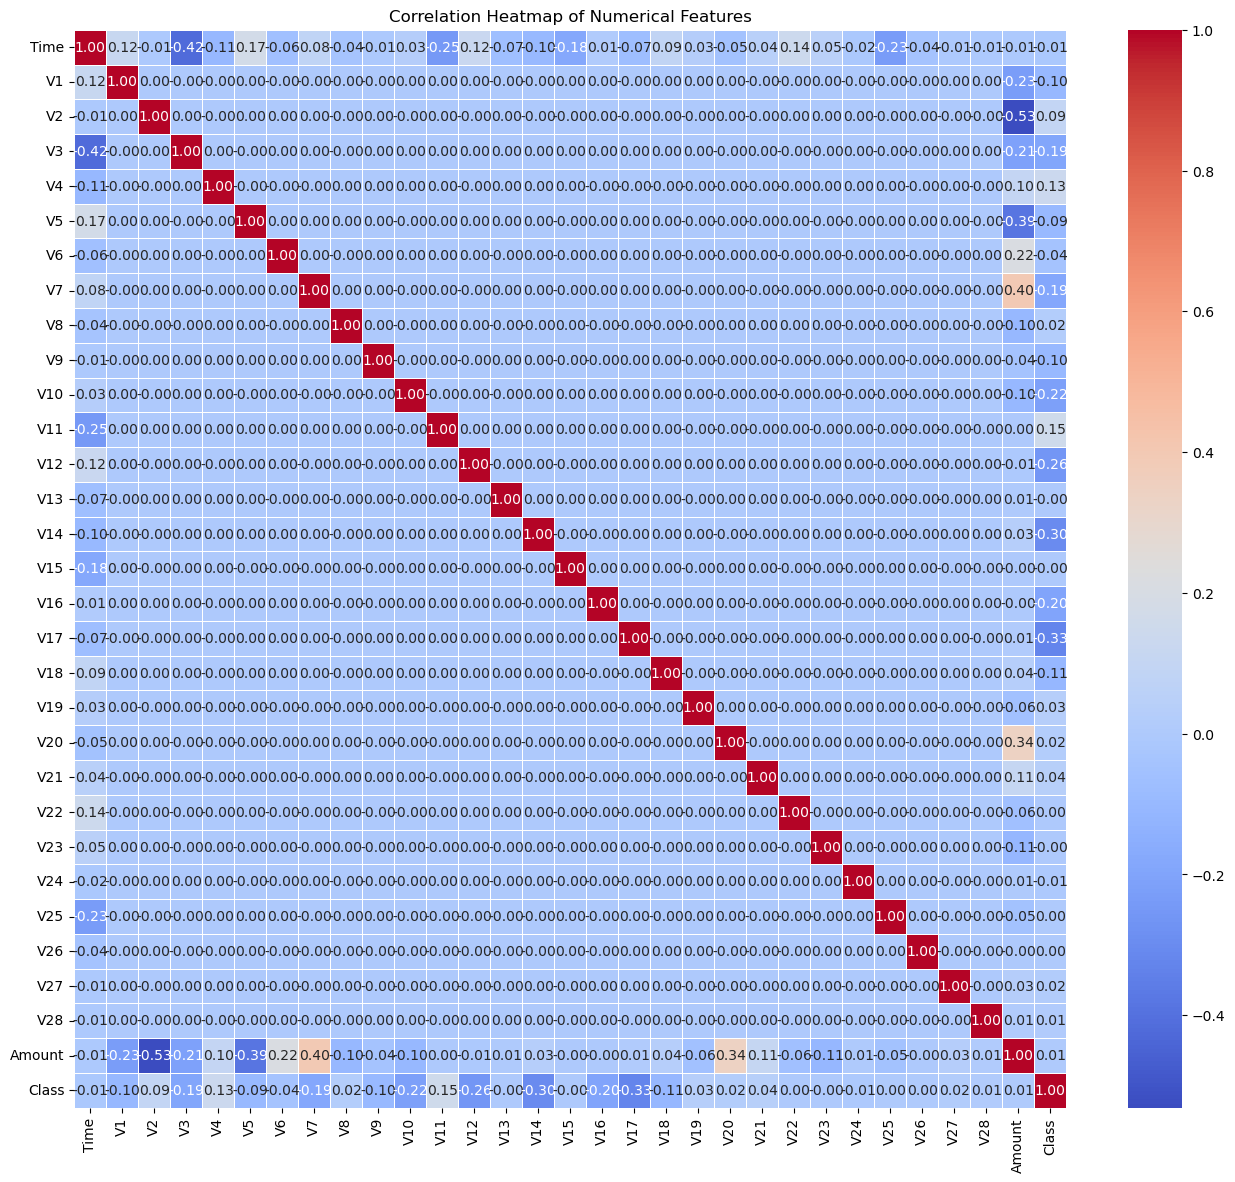

In [13]:
# Exclude the 'Amount_Range' column and calculate the correlation matrix for numerical features
numerical_df = df.select_dtypes(include=['float64', 'int64'])  # Only select numerical columns
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 14))  # Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Numerical Features')

# Show the plot
plt.show()
